## Parsing and Mapping time use data 

1. Level 02 - demographic details of individuals
2. Level 04 - time of survey 
3. Level 05 - Acitivity records of individuals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [2]:
colspecs2 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(39,40),(40,41),(41,44),(44,45),(45,47),(47,49),(49,51),(126,129),(129,139)]
dfTUS2 = pd.read_fwf('TUS106_L02.txt', colspecs2)
columns2 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","RelationToHead","Gender","Age","MaritalStatus","Education", "PrincipleActivity","Industry of work","NSC", "Multiplier"]
dfTUS2.columns =  columns2

colspecs4 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(44,45),(45,46),(46,47),(126,129),(129,139)]
dfTUS4 = pd.read_fwf('TUS106_L04.txt', colspecs4)
columns4 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "PersonID", "Day of the week", "Type of the day","Response code","NSC", "Multiplier"]
dfTUS4.columns =  columns4

colspecs5 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(42,45),(45,50),(50,55),(55,56),(56,57),(57,58), (58,59), (58,61),(61,62),(62,64),(64,65),(126,129),(129,139)]
dfTUS5 = pd.read_fwf('TUS106_L05.txt', colspecs5)                                                                                                               
columns5 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","Serial no of activity", "Time from","Time to","MultiActivity","SimulActivity", "MajorActivity","Activity group","Activity code", "Where","Paid-unpaid","Type of enterprise","NSC", "Multiplier"]
dfTUS5.columns =  columns5


## Edit: This script doesn't add zeros to file and directly parse raw data
- It creates NaNs where there is no response in the survey. 
- It helps seperate zero responses from 'denied to response' (i.e. NaNs).
- For example, With zero filled data, in the state of UP, missing values in TUS4 PersonID records were 3508 (of total 19806), without zero filling, missing values are 3579, 3581 and so on, varies column by column. 
- Likewise, there are 19734 records in Person ID in TUS5 - activity records, while 23314 Person ID in TUS2
- The primary aim is to identify and map these records in all three TUS dataframes and create a merged dataframe for final analysis.

In [3]:
# All india

print(dfTUS2.shape)
print(dfTUS4.shape)
print(dfTUS5.shape)

(518743, 17)
(447249, 13)
(9436776, 21)


## Time Use rural sector - Uttar Pradesh

In [4]:
## Filtering rural households of state of uttar pradesh 

dfTUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 9)]
dfTUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 9)]
dfTUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 9)]

In [5]:
## Uttar pradesh rural only

print(dfTUS2.shape)
print(dfTUS4.shape)
print(dfTUS5.shape)

(23314, 17)
(19806, 13)
(378140, 21)


In [6]:
dfTUS2['id'] = dfTUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS2 = dfTUS2.set_index('id')

dfTUS4['id'] = dfTUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS4 = dfTUS4.set_index('id')

dfTUS5['id'] = dfTUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS5 = dfTUS5.set_index('id')

In [7]:
## Total number of missing values

print(dfTUS2.isna().sum())
print(dfTUS4.isna().sum())
print(dfTUS5.isna().sum())

FSU                      0
Sector                   0
State                    0
District                 0
Stratum                  0
Sub-stratum              0
Sample HHID              0
PersonID                 0
RelationToHead           0
Gender                   0
Age                      0
MaritalStatus            0
Education                1
PrincipleActivity     3508
Industry of work     16470
NSC                      0
Multiplier               0
dtype: int64
FSU                 0
Sector              0
State               0
District            0
Stratum             0
Sub-stratum         0
Sample HHID         0
PersonID            0
Day of the week    71
Type of the day    71
Response code      73
NSC                 0
Multiplier          0
dtype: int64
FSU                           0
Sector                        0
State                         0
District                      0
Stratum                       0
Sub-stratum                   0
Sample HHID                   0
Perso

In [8]:
## Unique individual Person ID records in each

print(dfTUS2.index.nunique())
print(dfTUS4.index.nunique())
print(dfTUS5.index.nunique())

23314
19806
19735


## Keeping only PersonID records for which activities data are available

- Here, we need to locate and delete PersonIDs for which activities data is not available
- i.e. we will only keep 19735 PersonIDs and drop (23314 - 19806) + (19806-19736) = 3578

In [9]:
## Demographic details analysis

TUS_merged = pd.merge(dfTUS2, dfTUS4, how = 'outer')
TUS_merged.isna().sum()


FSU                      0
Sector                   0
State                    0
District                 0
Stratum                  0
Sub-stratum              0
Sample HHID              0
PersonID                 0
RelationToHead           0
Gender                   0
Age                      0
MaritalStatus            0
Education                1
PrincipleActivity     3508
Industry of work     16470
NSC                      0
Multiplier               0
Day of the week       3579
Type of the day       3579
Response code         3581
dtype: int64

In [10]:
# #TUS_merged.apply(np.isnan)
# a = TUS_merged[TUS_merged['Day of the week'].isnull()].index.tolist()
# print(len(a))
# print(a)

In [11]:
dfTUS2.equals(dfTUS4)

False

In [12]:
print(dfTUS2.shape)
print(dfTUS4.shape)

(23314, 17)
(19806, 13)


In [13]:
# TUS_full = pd.concat([dfTUS5, TUS_merged],axis=1) - this doesn't work due to mismatch in index

In [14]:
TUS_full = pd.merge(dfTUS5, TUS_merged, left_index=True, right_index = True)
TUS_full.index.nunique()

19735

In [15]:
## Matching list a (TUS_merged person ID) to list b (TUS_full person ID)

#b = TUS_full[TUS_full['Day of the week'].isnull()].index.tolist()
#len(b)
#print(b)

In [16]:
#(TUS_full.Where == 1).value_counts()

In [17]:
TUS_full.columns

Index(['FSU_x', 'Sector_x', 'State_x', 'District_x', 'Stratum_x',
       'Sub-stratum_x', 'Sample HHID_x', 'PersonID_x', 'Serial no of activity',
       'Time from', 'Time to', 'MultiActivity', 'SimulActivity',
       'MajorActivity', 'Activity group', 'Activity code', 'Where',
       'Paid-unpaid', 'Type of enterprise', 'NSC_x', 'Multiplier_x', 'FSU_y',
       'Sector_y', 'State_y', 'District_y', 'Stratum_y', 'Sub-stratum_y',
       'Sample HHID_y', 'PersonID_y', 'RelationToHead', 'Gender', 'Age',
       'MaritalStatus', 'Education', 'PrincipleActivity', 'Industry of work',
       'NSC_y', 'Multiplier_y', 'Day of the week', 'Type of the day',
       'Response code'],
      dtype='object')

In [18]:
Col = ("FSU_x", "Sector_x", "State_x", "District_x", "Stratum_x","Sub-stratum_x", "Sample HHID_x", "PersonID_x", "Type of enterprise", "NSC_x", "Multiplier_x", "FSU_y", "Sector_y",
      "State_y", "District_y", "Stratum_y", "Sub-stratum_y", "Sample HHID_y","PersonID_y", "Industry of work", "NSC_y","Multiplier_y", "Response code")

TUS_full_new = TUS_full.drop(columns = ["NSC_x", "NSC_y"], axis=1)

#del TUS_full["FSU_x", "Sector_x", "State_x", "District_x", "Stratum_x","Sub-stratum_x", "Sample HHID_x", "PersonID_x", "Type of enterprise", "NSC_x", "Multiplier_x", "FSU_y", "Sector_y",
  #     "State_y", "District_y", "Stratum_y", "Sub-stratum_y", "Sample HHID_y","PersonID_y", "Industry of work", "NSC_y","Multiplier_y", "Response code"]

In [19]:
TUS_full_final = TUS_full_new.drop(columns = ["FSU_x", "Sector_x", "State_x", "District_x", "Stratum_x","Sub-stratum_x", "Sample HHID_x", "PersonID_x", "Type of enterprise", "Multiplier_x", "FSU_y", "Sector_y",
      "State_y", "District_y", "Stratum_y", "Sub-stratum_y", "Sample HHID_y","PersonID_y", "Industry of work","Multiplier_y", "Response code"], axis=1 )

In [20]:
TUS_full_final

,Serial no of activity,Time from,Time to,MultiActivity,SimulActivity,MajorActivity,Activity group,Activity code,Where,Paid-unpaid,RelationToHead,Gender,Age,MaritalStatus,Education,PrincipleActivity,Day of the week,Type of the day
0,1,04:00,05:00,2.0,NaN,1,9,911,1,1,1.0,1,27,1,6.0,91.0,1.0,1.0
0,2,05:00,05:30,2.0,NaN,1,9,931,2,1,1.0,1,27,1,6.0,91.0,1.0,1.0
0,3,05:30,06:00,2.0,NaN,1,7,742,2,1,1.0,1,27,1,6.0,91.0,1.0,1.0
0,4,06:00,07:00,1.0,2.0,2,9,922,1,1,1.0,1,27,1,6.0,91.0,1.0,1.0
0,5,06:00,07:00,NaN,NaN,1,8,850,1,1,1.0,1,27,1,6.0,91.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,15,20:00,20:30,NaN,NaN,2,7,711,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0
19734,16,20:30,21:00,2.0,NaN,1,7,790,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0
19734,17,21:00,21:30,2.0,NaN,1,7,711,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0
19734,18,21:30,22:00,2.0,NaN,1,8,842,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0


In [21]:
TUS_full_final["Start_time"] = pd.to_datetime(TUS_full_final['Time from'], format="%H:%M").dt.time
TUS_full_final["End_time"] = pd.to_datetime(TUS_full_final['Time to'], format="%H:%M").dt.time

In [61]:
#TUS_full_final.drop(TUS_full_final["Diff"], axis=1)

In [62]:
#s = pd.Series(pd.date_range("2019-1-1", periods=48, freq="30m"))

In [63]:
#(TUS_full_final.Start_time - TUS_full_final.End_time)/pd.timedelta(hours=1)

In [22]:
TUS_full_final

,Serial no of activity,Time from,Time to,MultiActivity,SimulActivity,MajorActivity,Activity group,Activity code,Where,Paid-unpaid,RelationToHead,Gender,Age,MaritalStatus,Education,PrincipleActivity,Day of the week,Type of the day,Start_time,End_time
0,1,04:00,05:00,2.0,NaN,1,9,911,1,1,1.0,1,27,1,6.0,91.0,1.0,1.0,04:00:00,05:00:00
0,2,05:00,05:30,2.0,NaN,1,9,931,2,1,1.0,1,27,1,6.0,91.0,1.0,1.0,05:00:00,05:30:00
0,3,05:30,06:00,2.0,NaN,1,7,742,2,1,1.0,1,27,1,6.0,91.0,1.0,1.0,05:30:00,06:00:00
0,4,06:00,07:00,1.0,2.0,2,9,922,1,1,1.0,1,27,1,6.0,91.0,1.0,1.0,06:00:00,07:00:00
0,5,06:00,07:00,NaN,NaN,1,8,850,1,1,1.0,1,27,1,6.0,91.0,1.0,1.0,06:00:00,07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,15,20:00,20:30,NaN,NaN,2,7,711,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0,20:00:00,20:30:00
19734,16,20:30,21:00,2.0,NaN,1,7,790,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0,20:30:00,21:00:00
19734,17,21:00,21:30,2.0,NaN,1,7,711,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0,21:00:00,21:30:00
19734,18,21:30,22:00,2.0,NaN,1,8,842,1,1,2.0,2,43,2,1.0,92.0,3.0,1.0,21:30:00,22:00:00


In [32]:
TUS_time = TUS_full_final.loc[:,['Start_time','Activity group']]

TUS_time = TUS_time.reset_index().set_index('Start_time')
TUS_time

,index,Activity group
Start_time,,
04:00:00,0,9
05:00:00,0,9
05:30:00,0,7
06:00:00,0,9
06:00:00,0,8
...,...,...
20:00:00,19734,7
20:30:00,19734,7
21:00:00,19734,7


In [40]:
Time_range = pd.date_range(start='01/01/2019', periods=48, freq='30min')
Time_range

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:30:00',
               '2019-01-01 01:00:00', '2019-01-01 01:30:00',
               '2019-01-01 02:00:00', '2019-01-01 02:30:00',
               '2019-01-01 03:00:00', '2019-01-01 03:30:00',
               '2019-01-01 04:00:00', '2019-01-01 04:30:00',
               '2019-01-01 05:00:00', '2019-01-01 05:30:00',
               '2019-01-01 06:00:00', '2019-01-01 06:30:00',
               '2019-01-01 07:00:00', '2019-01-01 07:30:00',
               '2019-01-01 08:00:00', '2019-01-01 08:30:00',
               '2019-01-01 09:00:00', '2019-01-01 09:30:00',
               '2019-01-01 10:00:00', '2019-01-01 10:30:00',
               '2019-01-01 11:00:00', '2019-01-01 11:30:00',
               '2019-01-01 12:00:00', '2019-01-01 12:30:00',
               '2019-01-01 13:00:00', '2019-01-01 13:30:00',
               '2019-01-01 14:00:00', '2019-01-01 14:30:00',
               '2019-01-01 15:00:00', '2019-01-01 15:30:00',
               '2019-01-

In [52]:
Time_current = TUS_time.groupby('Start_time').nunique()
Time_current
#TUS_time_new = TUS_time.set_index(Time_range)

,index,Activity group
Start_time,,
00:00:00,340,7
00:30:00,70,5
01:00:00,74,5
01:30:00,20,3
02:00:00,72,4
02:30:00,109,6
03:00:00,175,5
03:30:00,190,6
04:00:00,19735,8


In [65]:
# # importing module
# import pandas as pd

# # create an array of 5 dates starting
# # at '2015-02-24', one per minute
# #dates = pd.date_range('2019-01-01', periods=10, freq='T')

# # creating dataframe with above array
# # of dates
# #df = pd.DataFrame({, "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
# #				"Price": [140, 120, 230, 40, 100, 450, 234, 785, 12, 42]})

# # display dataframe
# display(TUS_full_final)

# # applied groupby function

# TUS_full_final = TUS_full_final.set_index('Start_time')
# TUS_full_final.groupby(pd.Grouper(key='Start_time', freq='30min')).sum()


In [ ]:
normalizedDataFrame = dataFrame.div(dataFrame.sum(axis=1), axis=0);

 

years     = ("2016", "2017", "2018", "2019");

normalizedDataFrame.index = years;

 

# Draw a percentage based, stacked area plot

normalizedDataFrame.plot.area(stacked=True);

plot.show(block=True);

<AxesSubplot:xlabel='Time from'>

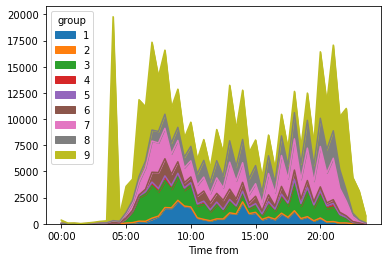

In [59]:
ad = TUS_full_final.copy()
action = ad[[col for col in list(ad) if (col.startswith('Time') or col.startswith('Activity group'))]]
list(action.columns.values)
occ = action
occ.loc[:,('group')] = action.loc[:,('Activity group')]
occ = occ.groupby(['Time from', 'group']).count().reset_index()
occ.pivot('Time from', 'group')['Activity group'].plot(kind='area')

In [78]:
times = TUS_full_final['Start_time'].unique()
prob_df = pd.DataFrame(index = times,columns = np.arange(0,10,1))
for time in times:
    dd1 = TUS_full_final[TUS_full_final['Start_time']==time]
    tot = dd1.shape[0]
    for gr in np.arange(0,10,1):
        prob_df[gr].loc[time] = dd1[dd1['Activity group']==gr].shape[0]/tot  

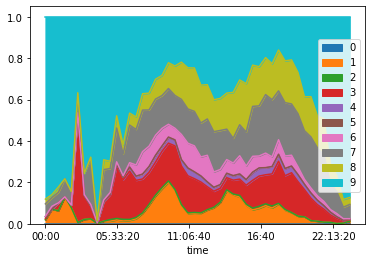

In [82]:
prob_df.plot(kind = 'area');
plt.show();  

In [80]:
times

array([datetime.time(4, 0), datetime.time(5, 0), datetime.time(5, 30),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(10, 0),
       datetime.time(10, 30), datetime.time(12, 30), datetime.time(13, 0),
       datetime.time(14, 30), datetime.time(15, 0), datetime.time(17, 0),
       datetime.time(17, 30), datetime.time(18, 0), datetime.time(18, 30),
       datetime.time(19, 0), datetime.time(20, 0), datetime.time(20, 30),
       datetime.time(21, 0), datetime.time(22, 30), datetime.time(23, 0),
       datetime.time(6, 30), datetime.time(13, 30), datetime.time(11, 30),
       datetime.time(11, 0), datetime.time(12, 0), datetime.time(14, 0),
       datetime.time(0, 0), datetime.time(1, 0), datetime.time(23, 30),
       datetime.time(0, 30), datetime.time(8, 0), datetime.time(9, 0),
       datetime.time(4, 30), datetime.time(21, 30), datetime.time(22, 0),
       datetime.time(9, 30), datetime.time(19, 30), datetime.time(7, 30),
       datetime.time(8, 30), datetime.time(16, 

In [20]:
TUS_full_final["time_elapsed"] = np.where((TUS_full_final["End_time"] - TUS_full_final["Start_time"]) > 0,
    (TUS_full_final["End_time"] - TUS_full_final["Start_time"]),
    (24 - TUS_full_final["Start_time"] + TUS_full_final["End_time"]))


TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'

In [1]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

#test:

t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
m = transition_matrix(t)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

0.67 0.33 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.50 0.12 0.12 0.25 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00
0.00 0.00 0.00 0.50 0.50 0.00 0.00 0.00 0.00
0.00 0.20 0.00 0.00 0.20 0.60 0.00 0.00 0.00
0.17 0.17 0.00 0.00 0.17 0.33 0.00 0.17 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00
0.00 0.33 0.00 0.00 0.00 0.33 0.00 0.00 0.33


In [87]:
import numpy as np

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = np.zeros((n,n))

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    M = M/M.sum(axis=1, keepdims=True)
    return M

#t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
t = [1,1,2,3,3,2]
m = transition_matrix(t)
for row in m: print(' '.join(f'{x:.2f}' for x in row))

nan nan nan nan
0.00 0.50 0.50 0.00
0.00 0.00 0.00 1.00
0.00 0.00 0.50 0.50


<ipython-input-87-a25fb711e544>:12: RuntimeWarning: invalid value encountered in true_divide
  M = M/M.sum(axis=1, keepdims=True)


In [5]:
type(t)

list

In [97]:
import numpy as np

def transition_matrix(timefrom, timeto):
    #n = timefrom #number of states

    M = np.zeros((len(timefrom), len(timeto))

    for (i,j) in zip(len(timefrom),len(timeto)):
        M[i][j] += 1

    #now convert to probabilities:
    M = M/M.sum(axis=1, keepdims=True)
    return M

#t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
timefrom = TUS_full_final['Start_time']
timeto = TUS_full_final['End_time']
m = transition_matrix(timefrom, timeto)
for row in m: print(' '.join(f'{x:.2f}' for x in row))

SyntaxError: invalid syntax (<ipython-input-97-733cdf277b4e>, line 8)